In [1]:
# Importing Required Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('OnlineRetail.csv',encoding='unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


### Exploratory Data Analysis

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

from pandas.plotting import scatter_matrix
_ = scatter_matrix(df)

In [7]:
df.shape

(541909, 8)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(406829, 8)

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df["Country"].value_counts().head()

United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: Country, dtype: int64

In [12]:
country = {"Country": {'Australia':0,'Austria':1,'Bahrain':2,'Belgium':3,'Brazil':4,'Canada':5,'Channel Islands':6,'Cyprus':7,'Czech Republic':8,'Denmark':9,'EIRE':10,'European Community':11,'Finland':12,'France':13,'Germany':14,'Greece':15,'Hong Kong':16,'Iceland':17,'Israel':18,'Italy':19,'Japan':20,'Lebanon':21,'Lithuania':22,'Malta':23,'Netherlands':24,'Norway':25,'Poland':26,'Portugal':27,'RSA':28,'Saudi Arabia':29,'Singapore':30,'Spain':31,'Sweden':32,'Switzerland':33,'United Arab Emirates':34,'United Kingdom':35,'Unspecified':36,'USA':37}
                }
df.replace(country, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,35
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,35


In [13]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [14]:
df.dropna(inplace = True) 

In [15]:
df.shape

(397884, 8)

In [16]:
df['TotalPrice'] = df['UnitPrice']*df['Quantity']

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,35,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,35,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,35,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,35,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,35,20.34


In [18]:
df.groupby("Country").agg({"TotalPrice":"sum"}).head()

,TotalPrice
Country,
0,138521.31
1,10198.68
2,548.40
3,41196.34
4,1143.60


### K means Clustering on Raw Dataset

In [19]:
dataset = df.drop(['InvoiceNo','Description', 'StockCode', 'InvoiceDate'],axis=1,errors='ignore')
x = dataset.values[:,1:]
dataset.head()

,Quantity,UnitPrice,CustomerID,Country,TotalPrice
0,6,2.55,17850.0,35,15.30
1,6,3.39,17850.0,35,20.34
2,8,2.75,17850.0,35,22.00
3,6,3.39,17850.0,35,20.34
4,6,3.39,17850.0,35,20.34


# RFM ANALYSIS

In [20]:
df["InvoiceNo"].nunique()

18532

In [21]:
df["InvoiceDate"].min()

'01-02-2011 08:23'

In [22]:
df["InvoiceDate"].max()

'31-10-2011 17:13'

In [23]:
import datetime as dt
today = dt.datetime(2012,1,1) 
print(today)

2012-01-01 00:00:00


In [24]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [25]:
rfm = df.copy()
rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,35,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,35,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,35,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,35,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,35,20.34


In [26]:
rfm["CustomerID"] = rfm["CustomerID"].astype(int)

In [27]:
recency_df = rfm.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today - x.max()).days})
recency_df.rename(columns={"InvoiceDate": "Recency"}, inplace = True)
recency_df.head()

,Recency
CustomerID,
12346,347
12347,61
12348,97
12349,40
12350,332


In [28]:
temp_df = rfm.groupby(["CustomerID","InvoiceNo"]).agg({"InvoiceNo":"count"})
temp_df.groupby("CustomerID").agg({"InvoiceNo":"count"}).head()
freq_df = temp_df.groupby("CustomerID").agg({"InvoiceNo":"sum"})
freq_df.rename(columns={"InvoiceNo": "Frequency"}, inplace = True)
freq_df.head()

,Frequency
CustomerID,
12346,1
12347,182
12348,31
12349,73
12350,17


In [29]:
monetary_df = rfm.groupby("CustomerID").agg({"TotalPrice":"sum"})
monetary_df.rename(columns={"TotalPrice": "Monetary"}, inplace = True)
monetary_df.head()

,Monetary
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


In [30]:
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1) 
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,347,1,77183.60
12347,61,182,4310.00
12348,97,31,1797.24
12349,40,73,1757.55
12350,332,17,334.40


In [31]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'], 5, labels = [1, 2, 3, 4, 5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346,347,1,77183.60,1,1,5
12347,61,182,4310.00,4,5,5
12348,97,31,1797.24,3,3,4
12349,40,73,1757.55,4,4,4
12350,332,17,334.40,1,2,2


In [32]:
import seaborn as sns

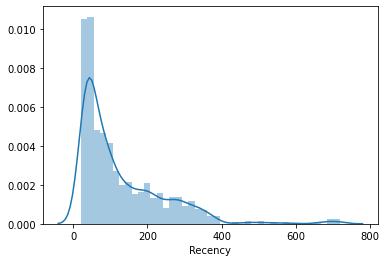

In [33]:
x = rfm['Recency']
ax = sns.distplot(x)

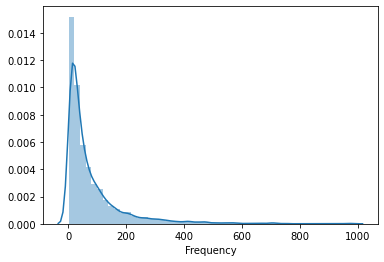

In [34]:
x = rfm.query('Frequency < 1000')['Frequency']
ax = sns.distplot(x)

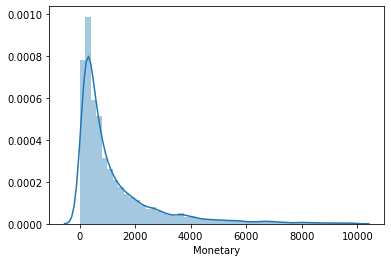

In [35]:
x = rfm.query('Monetary < 10000')['Monetary']
ax = sns.distplot(x)

In [36]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346,347,1,77183.60,1,1,5
12347,61,182,4310.00,4,5,5
12348,97,31,1797.24,3,3,4
12349,40,73,1757.55,4,4,4
12350,332,17,334.40,1,2,2


In [37]:
rfm["RFM Score"] = (rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str))
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Score
CustomerID,,,,,,,
12346,347,1,77183.60,1,1,5,115
12347,61,182,4310.00,4,5,5,455
12348,97,31,1797.24,3,3,4,334
12349,40,73,1757.55,4,4,4,444
12350,332,17,334.40,1,2,2,122


In [38]:
rfm['RFM Loyalty Point'] = rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].sum(axis = 1)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Score,RFM Loyalty Point
CustomerID,,,,,,,,
12346,347,1,77183.60,1,1,5,115,7.0
12347,61,182,4310.00,4,5,5,455,14.0
12348,97,31,1797.24,3,3,4,334,10.0
12349,40,73,1757.55,4,4,4,444,12.0
12350,332,17,334.40,1,2,2,122,5.0


In [39]:
Loyalty_Level = ['Bronze', 'Silver', 'Gold','Platinum']
Score_cuts = pd.qcut(rfm['RFM Loyalty Point'], q = 4, labels = Loyalty_Level)
rfm['RFM Loyalty Level'] = Score_cuts.values
rfm.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Score,RFM Loyalty Point,RFM Loyalty Level
0,12346,347,1,77183.60,1,1,5,115,7.0,Silver
1,12347,61,182,4310.00,4,5,5,455,14.0,Platinum
2,12348,97,31,1797.24,3,3,4,334,10.0,Gold
3,12349,40,73,1757.55,4,4,4,444,12.0,Gold
4,12350,332,17,334.40,1,2,2,122,5.0,Bronze


In [40]:
rfm[rfm['RFM Score']=='555'].sort_values('Monetary', ascending=False).reset_index().head(5)

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Score,RFM Loyalty Point,RFM Loyalty Level
0,14646,23,2076,280206.02,5,5,5,555,15.0,Platinum
1,18102,33,431,259657.30,5,5,5,555,15.0,Platinum
2,17450,24,337,194550.79,5,5,5,555,15.0,Platinum
3,14911,21,5675,143825.06,5,5,5,555,15.0,Platinum
4,14156,21,1400,117379.63,5,5,5,555,15.0,Platinum


In [41]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

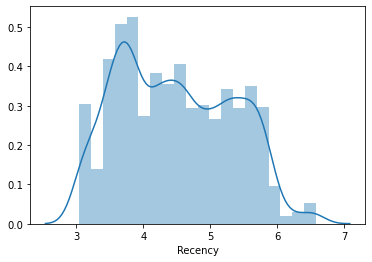

In [42]:
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

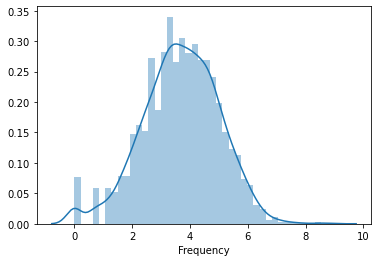

In [43]:
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

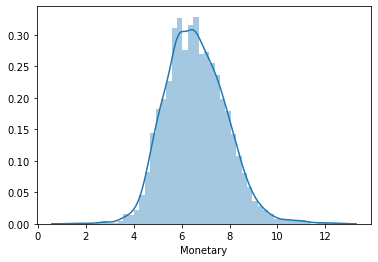

In [44]:
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [45]:
from sklearn.preprocessing import StandardScaler
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)
Scaled_Data = pd.DataFrame(Scaled_Data, index = rfm.index, columns = Log_Tfd_Data.columns)

In [46]:
Scaled_Data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,1.614527,-2.775156,3.698763
12347,-0.436026,1.149555,1.410440
12348,0.111418,-0.185329,0.716408
12349,-0.933916,0.460242,0.698958
12350,1.562614,-0.638586,-0.617720


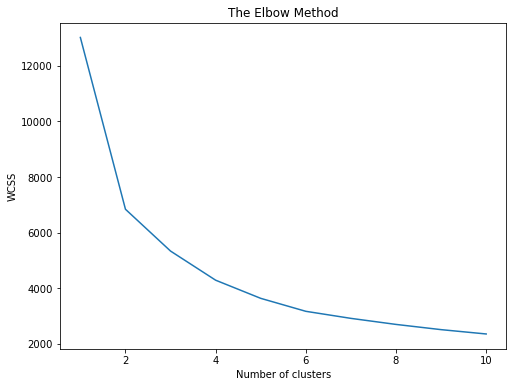

In [47]:
plt.figure(figsize=(8,6))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init=10, max_iter = 300)
    kmeans.fit(Scaled_Data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
tab = rfm.copy()

In [49]:
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
tab['Cluster'] = KMean_clust.labels_
tab.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Score,RFM Loyalty Point,RFM Loyalty Level,Cluster
CustomerID,,,,,,,,,,
12346,347,1,77183.60,1,1,5,115,7.0,Silver,2
12347,61,182,4310.00,4,5,5,455,14.0,Platinum,1
12348,97,31,1797.24,3,3,4,334,10.0,Gold,2
12349,40,73,1757.55,4,4,4,444,12.0,Gold,1
12350,332,17,334.40,1,2,2,122,5.0,Bronze,3


<Figure size 576x432 with 0 Axes>

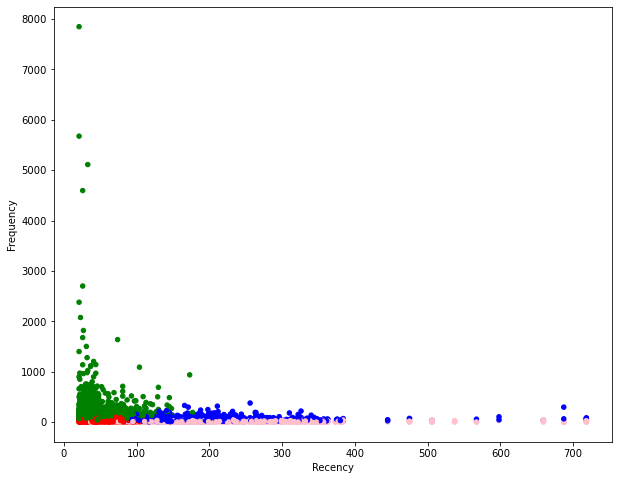

In [50]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue", "pink"]
tab['Color'] = tab['Cluster'].map(lambda p: Colors[p])
ax = tab.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = tab['Color']
)

## Customer Segmentation on the Basis of RFM Score

In [51]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [52]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

In [53]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Score,RFM Loyalty Point,RFM Loyalty Level,Segment
CustomerID,,,,,,,,,,
12346,347,1,77183.60,1,1,5,115,7.0,Silver,Hibernating
12347,61,182,4310.00,4,5,5,455,14.0,Platinum,Loyal Customers
12348,97,31,1797.24,3,3,4,334,10.0,Gold,Need Attention
12349,40,73,1757.55,4,4,4,444,12.0,Gold,Loyal Customers
12350,332,17,334.40,1,2,2,122,5.0,Bronze,Hibernating


In [54]:
rfm[rfm["Segment"] == "Need Attention"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Score,RFM Loyalty Point,RFM Loyalty Level,Segment
CustomerID,,,,,,,,,,
12348,97,31,1797.24,3,3,4,334,10.0,Gold,Need Attention
12379,103,40,852.24,3,3,3,333,9.0,Silver,Need Attention
12390,101,32,549.84,3,3,3,333,9.0,Silver,Need Attention
12425,100,36,777.20,3,3,3,333,9.0,Silver,Need Attention
12434,106,50,806.14,3,3,3,333,9.0,Silver,Need Attention


In [55]:
rfm[rfm["Segment"] == "Hibernating"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Score,RFM Loyalty Point,RFM Loyalty Level,Segment
CustomerID,,,,,,,,,,
12346,347,1,77183.6,1,1,5,115,7.0,Silver,Hibernating
12350,332,17,334.4,1,2,2,122,5.0,Bronze,Hibernating
12353,226,4,89.0,1,1,1,111,3.0,Bronze,Hibernating
12355,117,13,459.4,2,1,2,212,5.0,Bronze,Hibernating
12361,309,10,189.9,1,1,1,111,3.0,Bronze,Hibernating


In [56]:
rfm[rfm["Segment"] == "Champions"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Score,RFM Loyalty Point,RFM Loyalty Level,Segment
CustomerID,,,,,,,,,,
12359,30,248,6372.58,5,5,5,555,15.0,Platinum,Champions
12381,21,87,1845.31,5,4,4,544,13.0,Platinum,Champions
12383,30,99,1850.56,5,4,4,544,13.0,Platinum,Champions
12388,37,100,2780.66,5,4,5,545,14.0,Platinum,Champions
12395,26,156,3018.63,5,5,5,555,15.0,Platinum,Champions


## Data Visualisation

In [57]:
vis = rfm.copy()  

In [60]:
vis.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Score,RFM Loyalty Point,RFM Loyalty Level,Segment
CustomerID,,,,,,,,,,
12346,347,1,77183.60,1,1,5,115,7.0,Silver,Hibernating
12347,61,182,4310.00,4,5,5,455,14.0,Platinum,Loyal Customers
12348,97,31,1797.24,3,3,4,334,10.0,Gold,Need Attention
12349,40,73,1757.55,4,4,4,444,12.0,Gold,Loyal Customers
12350,332,17,334.40,1,2,2,122,5.0,Bronze,Hibernating


In [62]:
vis.drop(['Segment'],axis=1,inplace=True)

In [63]:
vis.drop(['RFM Loyalty Level'],axis=1,inplace=True)

In [64]:
vis.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM Score,RFM Loyalty Point
CustomerID,,,,,,,,
12346,347,1,77183.60,1,1,5,115,7.0
12347,61,182,4310.00,4,5,5,455,14.0
12348,97,31,1797.24,3,3,4,334,10.0
12349,40,73,1757.55,4,4,4,444,12.0
12350,332,17,334.40,1,2,2,122,5.0


In [65]:
from sklearn.manifold import TSNE
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    '''
    Implement k-means clustering on dataset
    
    INPUT:
        normalised_df_rfm : dataframe. Normalised rfm dataset for k-means to fit.
        clusters_number : int. Number of clusters to form.
        original_df_rfm : dataframe. Original rfm dataset to assign the labels to.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

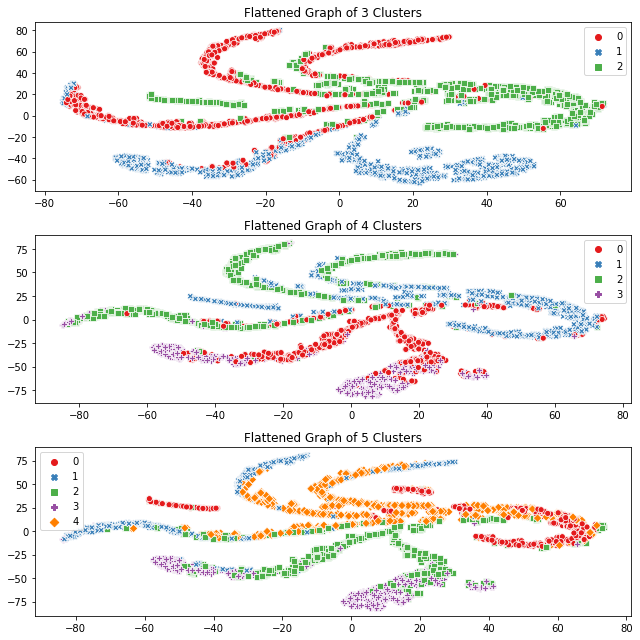

In [67]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(Scaled_Data, 3,vis)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(Scaled_Data, 4,vis)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(Scaled_Data, 5,vis)

plt.tight_layout()